## 1. Construye una serie a partir del siguiente diccionario: 
``` python

d = {'Alex': 6353, 'Wilmer': 9487, 'Isabel': 2233}
```

In [4]:
import pandas as pd

In [5]:
d = {'Alex': 6353, 'Wilmer': 9487, 'Isabel': 2233}

In [7]:
serie = pd.Series(d)

In [10]:
type(serie)

pandas.core.series.Series

In [11]:
serie

Alex      6353
Wilmer    9487
Isabel    2233
dtype: int64

## 2. Ahora, crea la misma serie, pero crealo directamente con estos indices (lee la documentación si es necesario):

```python
nombres = ['Wilmer', 'Lucas', 'Manu']

```

In [12]:
nombres = ['Wilmer', 'Lucas', 'Manu'] #mis nuevos indices
serie_nueva = pd.Series(serie, index = nombres)
serie_nueva

Wilmer    9487.0
Lucas        NaN
Manu         NaN
dtype: float64

Tras hacer el ejercicio, sale algo raro? Por qué?

In [13]:
#Los indices nuevos que no existian en la serie original nos los rellena con NaN porque nos los puede mapear

## 3. Cuantos nulos hay en la serie anterior?

In [15]:
serie_nueva.isna().sum()

2

## 4. Cargar el archivo "titanic.csv" en un DataFrame y mostrar 5 filas aleatorias del conjunto de datos.

In [17]:
titanic_df = pd.read_csv('datasets/titanic.csv')
titanic_df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
154,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
423,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
384,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
267,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S
410,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S


## 4a. Cuantas filas y columnas tiene el dataframe?

In [19]:
titanic_df.shape

(891, 11)

## 4.b Cuantos nulos hay en el dataframe?

In [22]:
titanic_df.isnull().sum() #podemos meter otro .sum() para ver el total de nulos dentro de todo el df

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4.c Puedes mostrarme, con una sola línea, las estadísticas del dataframe? (media, numero de filas no vacías, desviación típica, etc)

In [23]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 4.d Selecciona las columnas de pasajeros, edades y survived.

In [24]:
titanic_filtrado = titanic_df[['Name', 'Age','Survived']]
titanic_filtrado

,Name,Age,Survived
0,"Braund, Mr. Owen Harris",22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,"Heikkinen, Miss. Laina",26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,"Allen, Mr. William Henry",35.0,0
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,0
887,"Graham, Miss. Margaret Edith",19.0,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,0
889,"Behr, Mr. Karl Howell",26.0,1


## 5. Calcular el número total de pasajeros en el Titanic.

In [27]:
len(titanic_df.Name.unique())

891

In [29]:
titanic_df.Name.nunique()

891

In [32]:
titanic_df.shape[0] #De esta manera podemos ver que no hay nombres duplicados

891

## 6. Determinar la cantidad de pasajeros que sobrevivieron y los que no sobrevivieron.

In [35]:
titanic_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 7. Calcular el porcentaje de pasajeros que sobrevivieron en el Titanic.

In [39]:
supervivientes = titanic_df[(titanic_df['Survived']) == 1].count()['Survived']
supervivientes

342

In [41]:
porce_sobre_titanic = round((titanic_df[(titanic_df.Survived == 1)].count()[['Survived']] / titanic_df.Name.nunique()) *100,2)
porce_sobre_titanic

Survived    38.38
dtype: float64

## 8. Encontrar la edad promedio de los pasajeros a bordo.

In [43]:
round(titanic_df.Age.mean(),2)

29.7

## 9. Calcular la cantidad de hombres y mujeres que viajaban en el Titanic.

In [49]:
titanic_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## 10. Obtener el nombre de la persona más joven a bordo del Titanic.

In [53]:
titanic_df[(titanic_df.Age == titanic_df.Age.min())]['Name']

803    Thomas, Master. Assad Alexander
Name: Name, dtype: object

In [59]:
titanic_df[(titanic_df.Age == titanic_df.Age.min())]['Name'].values[0]

'Thomas, Master. Assad Alexander'

In [64]:
titanic_df.sort_values(by="Age",ascending=True)['Name'].head(1)

803    Thomas, Master. Assad Alexander
Name: Name, dtype: object

## 11. Calcular la tarifa promedio pagada por los pasajeros del Titanic.

In [66]:
round(titanic_df.Fare.mean(),2)

32.2

## 12. Encontrar el número de pasajeros en cada clase (primera, segunda y tercera).

In [69]:
titanic_df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## 13. Calcular la cantidad de pasajeros que viajaban solos en comparación con los que viajaban con familiares.

In [75]:
solos = titanic_df[(titanic_df.SibSp == 0) & (titanic_df.Parch == 0)].shape[0] #viajan totalmente solos Sin SibMujer ni otros famliares

In [77]:
 acompañados = titanic_df[(titanic_df.SibSp != 0) | (titanic_df.Parch != 0)].shape[0]

In [79]:
titanic_df.shape[0] == solos + acompañados

True

## 14. Encontrar la edad promedio de los pasajeros que sobrevivieron y los que no sobrevivieron.

In [88]:
supervivientes_edad = round(titanic_df[(titanic_df.Survived == 1)].Age.mean(),2)
supervivientes_edad

28.34

In [89]:
muertos_edad = round(titanic_df[(titanic_df.Survived != 1)].Age.mean(),2)
muertos_edad

30.63

## 15. Obtener el número de sobrevivientes por clase de pasajero.(Pclass)

In [90]:
titanic_df[(titanic_df.Survived == 1)].Pclass.value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

## 16. Encontrar la tarifa más alta pagada por un pasajero a bordo.

In [92]:
round(titanic_df.Fare.max(),2)

512.33

## 17. Calcular la cantidad de pasajeros que tenían hermanos o cónyuges a bordo.

In [98]:
titanic_df[(titanic_df.SibSp != 0)].Name.count()

283


## 18. Determinar la cantidad de pasajeros que embarcaron en cada puerto (Cherburgo, Queenstown y Southampton).

In [99]:
titanic_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## 19. Crea una copia del dataframe. A partir de ahora, trabajaras con esa copia.

In [100]:
df = titanic_df.copy()

## 20.Crea una columna que sea el doble de la tarifa.

In [110]:
df['doble_tarifa'] = round(df.Fare*2,2)
df.Fare = round(df.Fare,2)

In [112]:
df[['Fare','doble_tarifa']]

,Fare,doble_tarifa
0,7.25,14.50
1,71.28,142.57
2,7.92,15.85
3,53.10,106.20
4,8.05,16.10
...,...,...
886,13.00,26.00
887,30.00,60.00
888,23.45,46.90
889,30.00,60.00


## 21. Crea una columna que te coja la primera palabra después de la coma del nombre. Hazlo de forma directa y también con apply

In [127]:
def prim_pal(cadena):
    primera = cadena.split(',')[1]
    segunda = primera.split()[0]
    return (segunda)

In [128]:
prueba = 'Cumings, Mrs. John Bradley'
prim_pal(prueba)

'Mrs.'

In [134]:
df['prim_pal'] = df.Name.apply(prim_pal)
df.prim_pal.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [139]:
df[(df.prim_pal == 'the')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,doble_tarifa,prim_pal
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,173.0,the


In [140]:
df[(df.prim_pal == 'Jonkheer.')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,doble_tarifa,prim_pal
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,0.0,Jonkheer.


## 22. Elimina las columnas de nombre y de tarifa.

In [141]:
df.drop(columns= ['Name','Fare'], inplace = True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin',
       'Embarked', 'doble_tarifa', 'prim_pal'],
      dtype='object')

## 23.Dame los valores únicos de la columna creada en el 21

In [142]:
df.prim_pal.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

## 24. Cambia el nombre de la columna Survived a: Sobrevivió.

In [145]:
df.rename(columns = {'Survived': 'Sobrevivió','Sex':'Sexo','Parch':'Parientes'})

,Sobrevivió,Pclass,Sexo,Age,SibSp,Parientes,Ticket,Cabin,Embarked,doble_tarifa,prim_pal
0,0,3,male,22.0,1,0,A/5 21171,NaN,S,14.50,Mr.
1,1,1,female,38.0,1,0,PC 17599,C85,C,142.57,Mrs.
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,15.85,Miss.
3,1,1,female,35.0,1,0,113803,C123,S,106.20,Mrs.
4,0,3,male,35.0,0,0,373450,NaN,S,16.10,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,NaN,S,26.00,Rev.
887,1,1,female,19.0,0,0,112053,B42,S,60.00,Miss.
888,0,3,female,NaN,1,2,W./C. 6607,NaN,S,46.90,Miss.
889,1,1,male,26.0,0,0,111369,C148,C,60.00,Mr.


## 25. Borra las filas 1, 32 y 48

In [151]:
df.drop(axis = 0, labels = [1,32,48], inplace = True, errors = 'ignore')

In [149]:
titanic_df.drop([1,32,48], axis = 0, inplace = True)
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [152]:
titanic_df.drop([2,3,4], inplace = True)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 26. Creame un grafico de barras que muestre cuantas personas sobrevivieron y cuantas no en función de su sexo.

In [3]:
import pandas as pd
df = pd.read_csv('datasets/titanic.csv')

In [1]:
#%conda install seaborn
import seaborn as sns #esto es un standard

<AxesSubplot:xlabel='Sex', ylabel='count'>

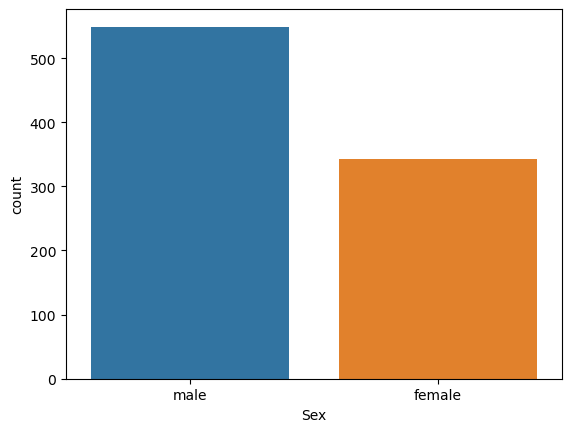

In [6]:
sns.barplot(data=df, x = df['Sex'], y = df['Survived'].value_counts()) #Esto es el conteo de hombres y de mujeres

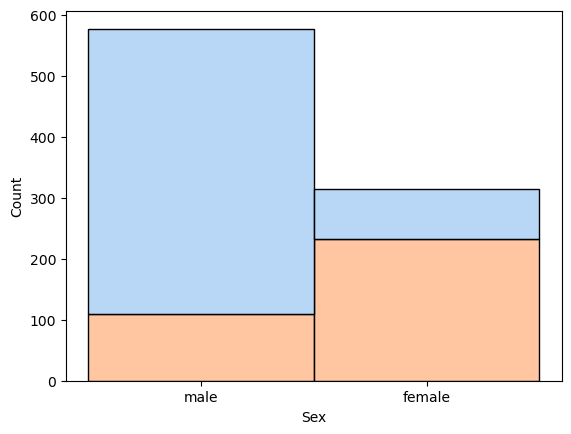

In [19]:
# penguins = sns.load_dataset("penguins")--> ejemplo que hemos visto en la docu de Seaborn (https://seaborn.pydata.org/tutorial/function_overview.html)
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#Lo adaptamos a nuestro plot

with sns.color_palette("pastel"):
    sns.histplot(data=df, x=df['Sex'], hue=df.Survived, multiple="stack",legend=False)

In [9]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64